© 2024 Nokia
Licensed under the BSD 3 Clause Clear License  
SPDX-License-Identifier: BSD-3-Clause-Clear

In [1]:
import os
import pickle
import re

import pandas as pd
import scipy
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from fairness_utilities import *
from definitions import ROOT_DIR

from sklearn import metrics

import seaborn as sns
sns.set(font_scale = 1.5)

seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

import simclr_models
import simclr_utitlities

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set(style='white', context="poster", font='Work Sans Regural')

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


## MODEL SUMMARY

In [3]:
# Dataset-specific - Updated implementation with hyper-parameter tuning

# data folder structure
data_folder = 'GLOBEM'
# model folder structure
working_directory = 'GLOBEM/'

# SimCLR finetuned models
# FROZEN: 3
# subfolder = '20231128-152654_e200_esTrue_bs128_wTrue_f3'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.1.71.hdf5'
# frozen_layers = 3
# added_layers = 2
# tag = 'frozen3'
# FROZEN: 2 (f-m)
# subfolder = '20231128-152630_e200_esTrue_bs128_wTrue_f2'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.1.19.hdf5'
# frozen_layers = 2
# added_layers = 2
# tag = 'frozen2'
# # FROZEN: 2 (f-l)
# subfolder = '20231128-152529_e200_esTrue_bs128_wTrue_f2_fl'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.1.41.hdf5'
# frozen_layers = 2
# added_layers = 2
# tag = 'frozen2fl'
# # FROZEN: 1 (f)
# subfolder = '20231128-152601_e200_esTrue_bs128_wTrue_f1'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.1.08.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1'
# FROZEN: 1 (m)
subfolder = '20231128-152400_e200_esTrue_bs128_wTrue_f1_m'
image_folder = os.path.join(data_folder, 'img', subfolder)
model_name = 'simclr.frozen.1.58.hdf5'
frozen_layers = 1
added_layers = 2
tag = 'frozen1m'
# FROZEN: 0
# subfolder = '20231128-152548_e200_esTrue_bs128_wTrue_f0'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.1.56.hdf5'
# frozen_layers = 0
# added_layers = 2
# tag = 'frozen0'
# # SUPERVISED
# working_directory = '..\Supervised\GLOBEM'
# subfolder = '20231115-091914_l2_e200_esTrue_bs64_wTrue'
# image_folder = os.path.join(working_directory, 'img', subfolder)
# model_name = "supervised.finetuned.hdf5"
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised'
#
#
# pretrained_model = tf.keras.models.load_model(os.path.join(working_directory, subfolder, model_name), compile=False)  # compile=False as we use the model only for inference
# if not os.path.exists(image_folder):
#     os.makedirs(image_folder)
# pretrained_model.summary()

In [4]:
# Dataset-specific - MARIA'S IMPLEMENTATION

# # data folder structure
# data_folder = 'GLOBEM'
# # model folder structure
# working_directory = 'GLOBEM/'

# SimCLR finetuned models
# FROZEN: 3
# subfolder = '20231114-113050_e100_esFalse_bs128_wFalse_f3'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.1.05.hdf5'
# frozen_layers = 3
# added_layers = 2
# tag = 'frozen3'
# FROZEN: 2 (f-m)
# subfolder = '20231114-112937_e100_esFalse_bs128_wFalse_f2'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.97.hdf5'
# frozen_layers = 2
# added_layers = 2
# tag = 'frozen2'
# # FROZEN: 2 (f-l)
# subfolder = '20231114-112324_e100_esFalse_bs128_wFalse_f2_fl'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.96.hdf5'
# frozen_layers = 2
# added_layers = 2
# tag = 'frozen2fl'
# # FROZEN: 1 (f)
# subfolder = '20231114-112818_e100_esFalse_bs128_wFalse_f1'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.92.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1'
# # FROZEN: 1 (m)
# subfolder = '20231114-112507_e100_esFalse_bs128_wFalse_f1_m'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.1.12.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m'
# # FROZEN: 0
# subfolder = '20231114-112650_e100_esFalse_bs128_wFalse_f0'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.1.23.hdf5'
# frozen_layers = 0
# added_layers = 2
# tag = 'frozen0'
# # SUPERVISED
# working_directory = '..\Supervised\GLOBEM'
# # subfolder = '20231114-141632_l2_e100_esFalse_bs128_wFalse'
# subfolder = '20231115-091914_l2_e200_esTrue_bs64_wTrue'
# image_folder = os.path.join(working_directory, 'img', subfolder)
# model_name = "supervised.finetuned.hdf5"
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised'


pretrained_model = tf.keras.models.load_model(os.path.join(working_directory, subfolder, model_name), compile=False)  # compile=False as we use the model only for inference
if not os.path.exists(image_folder):
    os.makedirs(image_folder)
pretrained_model.summary()

Model: "TPN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 1390)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 28, 32)            1067552   
_________________________________________________________________
dropout (Dropout)            (None, 28, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 96)            49248     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 96)            0       

## DATA SHAPES

In [5]:
# Load preprocessed data
np_train = (np.load(os.path.join(data_folder, 'train_x.npy')),
           np.load(os.path.join(data_folder, 'train_y.npy')))
np_val = (np.load(os.path.join(data_folder, 'val_x.npy')),
           np.load(os.path.join(data_folder, 'val_y.npy')))
np_test = (np.load(os.path.join(data_folder, 'test_x.npy')),
           np.load(os.path.join(data_folder, 'test_y.npy')))

probs = pretrained_model.predict(np_test[0])
predictions = np.argmax(probs, axis=1)
# print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0]), np_test[1], return_dict=True))

In [6]:
print("Train - Validation - Test Set Shapes:")
print("Train X: {} - Val X: {} - Test X: {}".format(np_train[0].shape, np_val[0].shape, np_test[0].shape))
print("Train y: {} - Val y: {} - Test y: {}".format(np_train[1].shape, np_val[1].shape, np_test[1].shape))

Train - Validation - Test Set Shapes:
Train X: (5957, 28, 1390) - Val X: (1082, 28, 1390) - Test X: (1083, 28, 1390)
Train y: (5957, 2) - Val y: (1082, 2) - Test y: (1083, 2)


In [7]:
# The test set values agree with the ones reported in the original paper: https://arxiv.org/pdf/1703.07771.pdf
pd.Series(np_test[1][:,1]).value_counts()

0.0    676
1.0    407
dtype: int64

In [9]:
ROOT_DIR = "../../../"
os.chdir(ROOT_DIR)
subjects = pd.read_csv(os.path.join('datasets', data_folder, 'demographics.csv'), delimiter=',')
# subject IDs per train-validation-test set
train_listfile = pd.read_csv(os.path.join('datasets', data_folder, 'train_listfile.csv'))
val_listfile = pd.read_csv(os.path.join('datasets', data_folder, 'val_listfile.csv'))
test_listfile = pd.read_csv(os.path.join('datasets', data_folder, 'test_listfile.csv'))
# change back the working directory
os.chdir(os.path.join('code', 'baselines', 'SimCLR'))
subjects.head()

,PID,gender,age,race,generation,disability
0,1,1.0,18.0,Asian,2.0,0.0
1,2,2.0,18.0,White,4.0,0.0
2,3,2.0,18.0,Biracial,4.0,0.0
3,4,2.0,18.0,Asian,2.0,0.0
4,5,2.0,18.0,Asian,2.0,0.0


In [10]:
train_listfile.shape

(5957, 7)

## PROTECTED ATTRIBUTE DISTRIBUTIONS

In [11]:
df = pd.concat([train_listfile, val_listfile, test_listfile])
print("Total rows: {}".format(df.shape[0]))
print(df.head(100))

Total rows: 8122
    PID  gender   age   race  generation  disability  year
0   1.0     1.0  18.0  Asian         2.0         0.0     1
1   1.0     1.0  18.0  Asian         2.0         0.0     1
2   1.0     1.0  18.0  Asian         2.0         0.0     1
3   1.0     1.0  18.0  Asian         2.0         0.0     1
4   1.0     1.0  18.0  Asian         2.0         0.0     1
..  ...     ...   ...    ...         ...         ...   ...
95  6.0     2.0  18.0  Asian         2.0         0.0     1
96  7.0     2.0  18.0  White         4.0         0.0     1
97  7.0     2.0  18.0  White         4.0         0.0     1
98  7.0     2.0  18.0  White         4.0         0.0     1
99  7.0     2.0  18.0  White         4.0         0.0     1

[100 rows x 7 columns]


In [12]:
train_listfile.shape

(5957, 7)

In [13]:
df.PID.nunique()

699

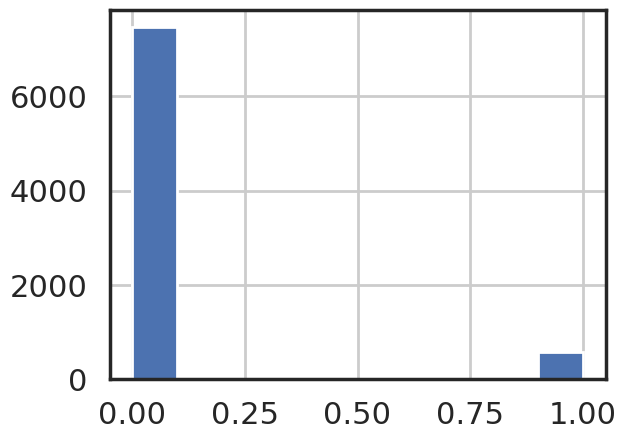

In [14]:
df.disability.hist()

In [15]:
df.gender = df.gender.apply(lambda v: 'Male' if v==1 else ('Female' if v==2 else ('Transgender' if v==3 else 'Genderqueer ' if v==4 else 'Other')))
df.disability = df.disability.apply(lambda v: 'Yes' if v==1 else 'No')

In [16]:
df

,PID,gender,age,race,generation,disability,year
0,1.0,Male,18.0,Asian,2.0,No,1
1,1.0,Male,18.0,Asian,2.0,No,1
2,1.0,Male,18.0,Asian,2.0,No,1
3,1.0,Male,18.0,Asian,2.0,No,1
4,1.0,Male,18.0,Asian,2.0,No,1
...,...,...,...,...,...,...,...
1078,999.0,Male,21.0,Asian,1.0,No,4
1079,999.0,Male,21.0,Asian,1.0,No,4
1080,999.0,Male,21.0,Asian,1.0,No,4
1081,999.0,Male,21.0,Asian,1.0,No,4


In [17]:
protected_attributes = ['gender', 'race', 'disability']
privileged_classes = [['Male'], ['White'], ['No']]

count_df = pd.concat(axis=0, ignore_index=True, objs=[
    df[protected_attribute].value_counts().reset_index(drop=False) for protected_attribute in protected_attributes
])
count_df = count_df.melt('index')
count_df.dropna(axis=0, inplace=True)
count_df.reset_index(inplace=True, drop=True)
# count_df["majority"] = np.where(count_df.index % 2, 0, 1)
# count_df.loc[:, "label"] = count_df.apply(lambda row: FRIENDLY_LABELS.get(row['variable']).get(row['index']), axis=1)
count_df.head(20)

,index,variable,value
0,Female,gender,4857.0
1,Male,gender,3177.0
2,Other,gender,54.0
3,Genderqueer,gender,22.0
4,Transgender,gender,12.0
5,Asian,race,4062.0
6,White,race,2477.0
7,Biracial,race,901.0
8,Latinx,race,472.0
9,Black,race,178.0


In [18]:
# sns.set_style('whitegrid')
# sns.set(font_scale = 1.5)
count_df = count_df[count_df.variable.isin(['gender', 'race', 'disability'])]
# g = sns.catplot(data=count_df[count_df.index.notnull()], x="label", col="x_label", y="value", kind='bar', hue="Segment", palette=['#1c9e77', '#cccccc'], sharex=False, ci=None, aspect=.5)
# ratios = count_df.groupby('x_label')['label'].nunique().values
ratios = [5, 5, 2]
count_df.loc[:, "variable"] = count_df.loc[:, "variable"].apply(lambda l: 'GENDER' if l=='gender' else ('ETHNICITY' if l=='race' else 'DISABILITY'))

In [19]:
count_df.loc[:, "Segment"] = count_df["index"].apply(lambda i: "Majority" if (i=="Female" or i=="Asian" or i=="No") else "Minority")
count_df

,index,variable,value,Segment
0,Female,GENDER,4857.0,Majority
1,Male,GENDER,3177.0,Minority
2,Other,GENDER,54.0,Minority
3,Genderqueer,GENDER,22.0,Minority
4,Transgender,GENDER,12.0,Minority
5,Asian,ETHNICITY,4062.0,Majority
6,White,ETHNICITY,2477.0,Minority
7,Biracial,ETHNICITY,901.0,Minority
8,Latinx,ETHNICITY,472.0,Minority
9,Black,ETHNICITY,178.0,Minority


In [20]:
count_df.loc[:, 'order'] = count_df.variable.apply(lambda v: 0 if v=='ETHNICITY' else (1 if v=='GENDER' else 2))
count_df.sort_values(by='order', ascending=True, inplace=True)
count_df

,index,variable,value,Segment,order
5,Asian,ETHNICITY,4062.0,Majority,0
6,White,ETHNICITY,2477.0,Minority,0
7,Biracial,ETHNICITY,901.0,Minority,0
8,Latinx,ETHNICITY,472.0,Minority,0
9,Black,ETHNICITY,178.0,Minority,0
0,Female,GENDER,4857.0,Majority,1
1,Male,GENDER,3177.0,Minority,1
2,Other,GENDER,54.0,Minority,1
3,Genderqueer,GENDER,22.0,Minority,1
4,Transgender,GENDER,12.0,Minority,1


C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


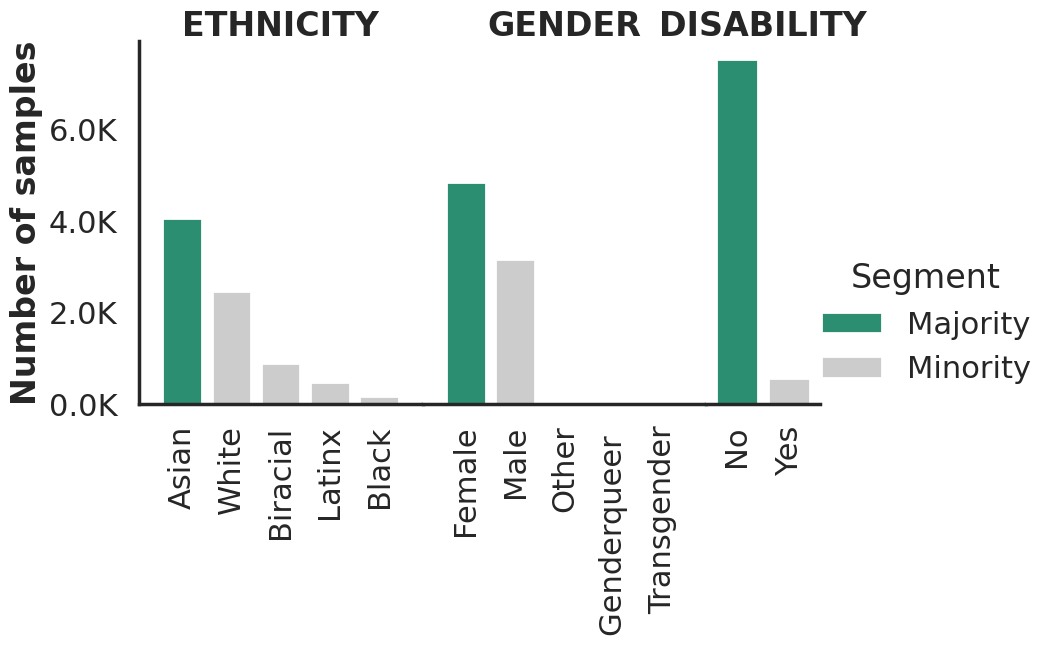

In [21]:
sns.set(style='white', context="poster", font='Work Sans Regural')

g = sns.catplot(data=count_df[count_df.index.notnull()], x="index", col="variable", ci=None, y="value", kind='bar', sharex=False, aspect=.5, dodge=False,
                # palette=['#1c9e77'],
                hue="Segment", palette=['#1c9e77', '#cccccc'],
                facet_kws={'gridspec_kws':{'width_ratios': ratios}})

g.set_titles("{col_name}")
g.set_ylabels('Number of samples')
g.set_xlabels('Protected Attribute')
g.set_xticklabels(rotation=90)

# plt.suptitle("Privileged vs. Unprivileged Group Representation (#Samples)")
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title(), fontdict={'weight': 'bold'})
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.xaxis.set_label_position('top')
    ylabels = ['{:}'.format(x) + 'K' for x in ax.get_yticks()/1000]
    ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
    ax.set_yticklabels(ylabels)
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

# plt.legend(labels=['Majority Segment', 'Minority Segment'], labelcolor=['#1c9e77', '#e72a8a'])
# plt.show()

plt.savefig(os.path.join(image_folder, 'representationBar.pdf'), format='pdf', bbox_inches="tight")
plt.savefig(os.path.join(image_folder, 'representationBar.png'))

In [22]:
count_df

,index,variable,value,Segment,order
5,Asian,ETHNICITY,4062.0,Majority,0
6,White,ETHNICITY,2477.0,Minority,0
7,Biracial,ETHNICITY,901.0,Minority,0
8,Latinx,ETHNICITY,472.0,Minority,0
9,Black,ETHNICITY,178.0,Minority,0
0,Female,GENDER,4857.0,Majority,1
1,Male,GENDER,3177.0,Minority,1
2,Other,GENDER,54.0,Minority,1
3,Genderqueer,GENDER,22.0,Minority,1
4,Transgender,GENDER,12.0,Minority,1


In [23]:
image_folder

'GLOBEM\\img\\20231128-152400_e200_esTrue_bs128_wTrue_f1_m'

In [24]:
# get numbers
# count_df_merged.groupby('variable').
count_df['percentage'] = count_df['value'] / count_df.groupby('variable')['value'].transform('sum')
count_df

,index,variable,value,Segment,order,percentage
5,Asian,ETHNICITY,4062.0,Majority,0,0.502101
6,White,ETHNICITY,2477.0,Minority,0,0.306180
7,Biracial,ETHNICITY,901.0,Minority,0,0.111372
8,Latinx,ETHNICITY,472.0,Minority,0,0.058344
9,Black,ETHNICITY,178.0,Minority,0,0.022002
0,Female,GENDER,4857.0,Majority,1,0.598005
1,Male,GENDER,3177.0,Minority,1,0.391160
2,Other,GENDER,54.0,Minority,1,0.006649
3,Genderqueer,GENDER,22.0,Minority,1,0.002709
4,Transgender,GENDER,12.0,Minority,1,0.001477


## OVERALL PERFORMANCE

In [799]:
# Overall performance
print("\n--- Train Performance Overall ---")
train_predictions = pretrained_model.predict(np_train[0])
train_performance = simclr_utitlities.evaluate_model_simple(train_predictions, np_train[1], return_dict=True)
print(train_performance)
print("\n--- Validation Performance Overall ---")
validation_predictions = pretrained_model.predict(np_val[0])
validation_performance = simclr_utitlities.evaluate_model_simple(validation_predictions, np_val[1], return_dict=True)
print(validation_performance)
print("\n--- Test Performance Overall ---")
test_predictions = pretrained_model.predict(np_test[0])
test_performance = simclr_utitlities.evaluate_model_simple(test_predictions, np_test[1], return_dict=True)
print(test_performance)


--- Train Performance Overall ---
{'Accuracy': 0.5554809467852946, 'Balanced Accuracy': 0.5534386689627545, 'AUROC': 0.582319068288405, 'AUPRC Macro': 0.55367662083067, 'AUPRC Micro': 0.55367662083067, 'Confusion Matrix': array([[1855, 1296],
       [1352, 1454]], dtype=int64), 'F1 Macro': 0.5534574786706589, 'F1 Micro': 0.5554809467852946, 'F1 Weighted': 0.5551983676969664, 'Precision': 0.5535747370808175, 'Recall': 0.5534386689627545, 'Kappa': 0.1069942344050292}

--- Validation Performance Overall ---
{'Accuracy': 0.48613678373382624, 'Balanced Accuracy': 0.4866422711726579, 'AUROC': 0.4690597484599063, 'AUPRC Macro': 0.4800898737612037, 'AUPRC Micro': 0.4800898737612037, 'Confusion Matrix': array([[336, 203],
       [353, 190]], dtype=int64), 'F1 Macro': 0.4766070881706061, 'F1 Micro': 0.48613678373382624, 'F1 Weighted': 0.47634600062092886, 'Precision': 0.48556191995627396, 'Recall': 0.4866422711726579, 'Kappa': -0.02668810179638692}

--- Test Performance Overall ---
{'Accuracy':

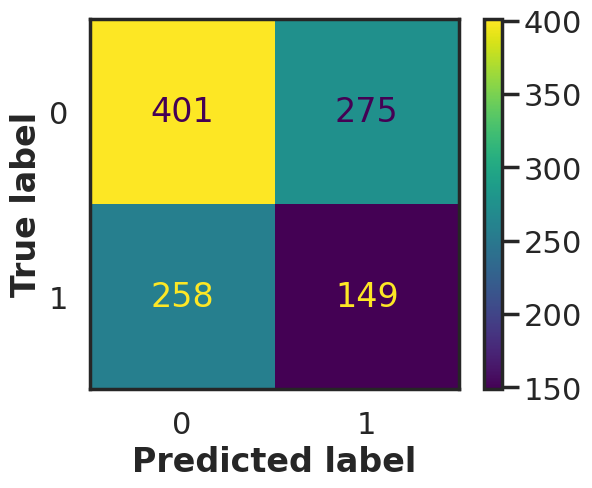

In [800]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = test_performance.get("Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
disp.figure_.savefig(os.path.join(image_folder, 'confusion_matrix.pdf'))

In [801]:
# overall
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], test_predictions, metric='AUROC')
print("Test Set AUC-ROC:\nAUC={} [CI {}-{}]".format(
    test_performance.get("AUROC"),
    low_CI_binary,
    high_CI_binary
))
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], test_predictions, metric='AUPRC Micro')
print("Test Set AUC-PRC:\nAUC-PRC={} [CI {}-{}]".format(
    test_performance.get("AUPRC"),
    low_CI_binary,
    high_CI_binary
))

Test Set AUC-ROC:
AUC=0.4823175784714246 [CI 0.4475437376897231-0.5198050631444793]
Test Set AUC-PRC:
AUC-PRC=None [CI 0.3333747552971241-0.41051320504172123]


In [802]:
import tensorflow.keras.backend as K

trainable_count = np.sum([K.count_params(w) for w in pretrained_model.trainable_weights])
metrics_ci = []
averages_ci = []
lows_ci = []
highs_ci = []
for metric in test_performance:
    if (metric == "Confusion Matrix") or (metric == "Kappa"):
        continue
    print("Calculating CI for {}...".format(metric))
    low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], test_predictions, metric=metric)
    metrics_ci.append(metric)
    averages_ci.append(test_performance.get(metric))
    highs_ci.append(high_CI_binary)
    lows_ci.append(low_CI_binary)
print(metrics_ci)
all_metrics_ci = pd.DataFrame({'metric': metrics_ci, 'value': averages_ci, 'low_ci': lows_ci, 'high_ci': highs_ci, 'parameters': trainable_count, 'model_name': model_name, 'subfolder': subfolder, 'added_layers': added_layers, 'frozen_layers': frozen_layers, 'tag': tag})

Calculating CI for Accuracy...
Calculating CI for Balanced Accuracy...
Calculating CI for AUROC...
Calculating CI for AUPRC Macro...
Calculating CI for AUPRC Micro...
Calculating CI for F1 Macro...
Calculating CI for F1 Micro...
Calculating CI for F1 Weighted...
Calculating CI for Precision...
Calculating CI for Recall...
['Accuracy', 'Balanced Accuracy', 'AUROC', 'AUPRC Macro', 'AUPRC Micro', 'F1 Macro', 'F1 Micro', 'F1 Weighted', 'Precision', 'Recall']


In [803]:
# working_directory = os.path.join("../Supervised", 'MESA')
all_metrics_ci.to_csv(os.path.join(working_directory, subfolder, model_name.replace('.hdf5', '_ci_metrics.csv')), index=False)
all_metrics_ci.head(10)

,metric,value,low_ci,high_ci,parameters,model_name,subfolder,added_layers,frozen_layers,tag
0,Accuracy,0.507849,0.476454,0.535549,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
1,Balanced Accuracy,0.479644,0.450776,0.512481,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
2,AUROC,0.482318,0.444956,0.519244,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
3,AUPRC Macro,0.368695,0.332993,0.409805,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
4,AUPRC Micro,0.368695,0.332312,0.408620,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
5,F1 Macro,0.479677,0.449987,0.508653,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
6,F1 Micro,0.507849,0.478301,0.537396,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
7,F1 Weighted,0.509749,0.480796,0.543793,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
8,Precision,0.479956,0.448080,0.511156,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
9,Recall,0.479644,0.451586,0.510136,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1


In [804]:
# logging results
# results = pd.DataFrame(columns=['model', 'aucroc', 'gender_best', 'gender_best_auc', 'gender_best_delta', 'gender_worst', 'gender_worst_auc', 'gender_worst_delta'])
results = {'model': subfolder, 'auc': test_performance.get('AUROC'), 'protected_attributes': {}}

## BIAS ANALYSIS

In [805]:
sns.set(style='white', font='Work Sans Regural')

In [806]:
test_listfile

,PID,gender,age,race,generation,disability,year
0,1221.0,1.0,21.0,Asian,1.0,1.0,4
1,1221.0,1.0,21.0,Asian,1.0,1.0,4
2,1221.0,1.0,21.0,Asian,1.0,1.0,4
3,1221.0,1.0,21.0,Asian,1.0,1.0,4
4,1221.0,1.0,21.0,Asian,1.0,1.0,4
...,...,...,...,...,...,...,...
1078,999.0,1.0,21.0,Asian,1.0,0.0,4
1079,999.0,1.0,21.0,Asian,1.0,0.0,4
1080,999.0,1.0,21.0,Asian,1.0,0.0,4
1081,999.0,1.0,21.0,Asian,1.0,0.0,4


In [807]:
test_listfile.gender = test_listfile.gender.apply(lambda v: 'Male' if v==1 else ('Female' if v==2 else ('Transgender' if v==3 else 'Genderqueer ' if v==4 else 'Other')))
test_listfile.disability = test_listfile.disability.apply(lambda v: 'Yes' if v==1 else 'No')
test_listfile.drop(columns=['generation', 'age', 'year'], inplace=True)
test_listfile

,PID,gender,race,disability
0,1221.0,Male,Asian,Yes
1,1221.0,Male,Asian,Yes
2,1221.0,Male,Asian,Yes
3,1221.0,Male,Asian,Yes
4,1221.0,Male,Asian,Yes
...,...,...,...,...
1078,999.0,Male,Asian,No
1079,999.0,Male,Asian,No
1080,999.0,Male,Asian,No
1081,999.0,Male,Asian,No


In [808]:
print("Test rows with null demograpphics: {} ({}%)".format(test_listfile.PID.isna().sum(), test_listfile.PID.isna().sum()/test_listfile.shape[0]))
test_listfile.drop(columns=['PID'], inplace=True)
test_listfile.head(20)

Test rows with null demograpphics: 11 (0.010156971375807941%)


,gender,race,disability
0,Male,Asian,Yes
1,Male,Asian,Yes
2,Male,Asian,Yes
3,Male,Asian,Yes
4,Male,Asian,Yes
5,Male,Asian,Yes
6,Male,Asian,Yes
7,Male,Asian,Yes
8,Male,Asian,Yes
9,Female,Asian,Yes


In [809]:
test_listfile.loc[:, "y_pred"] = predictions
test_listfile.head()

,gender,race,disability,y_pred
0,Male,Asian,Yes,0
1,Male,Asian,Yes,1
2,Male,Asian,Yes,1
3,Male,Asian,Yes,0
4,Male,Asian,Yes,0


In [810]:
# Overall performance
print("\n--- Train Performance Overall ---")
train_listfile.loc[:, "y_pred"] = np.argmax(train_predictions,axis=1)
print(train_performance)
print("\n--- Validation Performance Overall ---")
val_listfile.loc[:, "y_pred"] = np.argmax(validation_predictions,axis=1)
print(validation_performance)
print("\n--- Test Performance Overall ---")
print(test_performance)


--- Train Performance Overall ---
{'Accuracy': 0.5554809467852946, 'Balanced Accuracy': 0.5534386689627545, 'AUROC': 0.582319068288405, 'AUPRC Macro': 0.55367662083067, 'AUPRC Micro': 0.55367662083067, 'Confusion Matrix': array([[1855, 1296],
       [1352, 1454]], dtype=int64), 'F1 Macro': 0.5534574786706589, 'F1 Micro': 0.5554809467852946, 'F1 Weighted': 0.5551983676969664, 'Precision': 0.5535747370808175, 'Recall': 0.5534386689627545, 'Kappa': 0.1069942344050292}

--- Validation Performance Overall ---
{'Accuracy': 0.48613678373382624, 'Balanced Accuracy': 0.4866422711726579, 'AUROC': 0.4690597484599063, 'AUPRC Macro': 0.4800898737612037, 'AUPRC Micro': 0.4800898737612037, 'Confusion Matrix': array([[336, 203],
       [353, 190]], dtype=int64), 'F1 Macro': 0.4766070881706061, 'F1 Micro': 0.48613678373382624, 'F1 Weighted': 0.47634600062092886, 'Precision': 0.48556191995627396, 'Recall': 0.4866422711726579, 'Kappa': -0.02668810179638692}

--- Test Performance Overall ---
{'Accuracy':

In [811]:
# preparing for performance conditioned on protected attributes logging
con_metrics = []
con_protected_attributes = []
con_max_groups = []
con_max_values = []
con_min_groups = []
con_min_values = []
con_max_deltas = []
con_min_deltas = []

In [812]:
# ROC curves
MAX_AUC = -1
MAX_GROUP = ''
MIN_AUC = 1.1
MIN_GROUP = ''

In [813]:
def check_min_max(auc, group):
    global MAX_AUC, MAX_GROUP, MIN_AUC, MIN_GROUP
    if MAX_AUC < auc:
        MAX_AUC = auc
        MAX_GROUP = group
    if MIN_AUC > auc:
        MIN_AUC = auc
        MIN_GROUP = group

# preparing for performance conditioned on protected attributes logging
def append_row(general_auc, protected_attribute, metric='AUROC'):
    con_metrics.append(metric)
    con_protected_attributes.append(protected_attribute)
    con_max_groups.append(MAX_GROUP)
    con_max_values.append(MAX_AUC)
    con_min_groups.append(MIN_GROUP)
    con_min_values.append(MIN_AUC)
    con_max_deltas.append(MAX_AUC-general_auc)
    con_min_deltas.append(MIN_AUC-general_auc)

def reset_min_max():
    global MAX_AUC, MAX_GROUP, MIN_AUC, MIN_GROUP
    MAX_AUC = -1
    MAX_GROUP = ''
    MIN_AUC = 1.1
    MIN_GROUP = ''

## Performance conditioned on Gender

In [814]:
test_listfile.gender.value_counts()

Female          590
Male            459
Transgender      12
Genderqueer      11
Other            11
Name: gender, dtype: int64

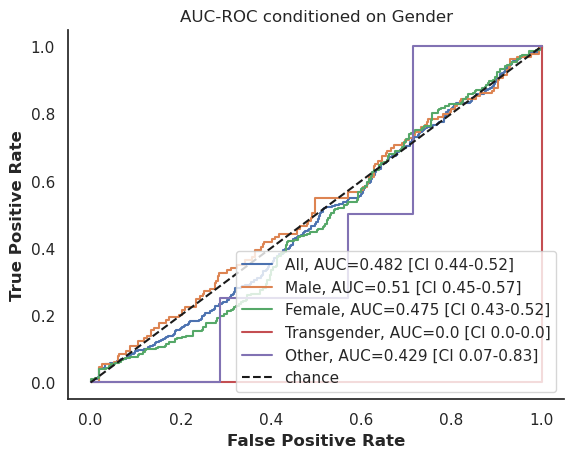

In [815]:
# ROC curves
# ALL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][:,1],
    test_predictions[:,1]
)
general_auc = np.round(metrics.roc_auc_score(np_test[1][:, 1], test_predictions[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], test_predictions, metric='AUROC')
plt.plot(fpr, tpr, label="All, AUC={} [CI {}-{}]".format(str(general_auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))

# MALE
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.gender == "Male"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.gender == "Male"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.gender == "Male", 1], pretrained_model.predict(np_test[0][test_listfile.gender == "Male"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.gender == "Male"], pretrained_model.predict(np_test[0][test_listfile.gender == "Male"]), metric='AUROC')
plt.plot(fpr, tpr, label="Male, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Male")

# FEMALE
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.gender == "Female"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.gender == "Female"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.gender == "Female", 1], pretrained_model.predict(np_test[0][test_listfile.gender == "Female"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.gender == "Female"], pretrained_model.predict(np_test[0][test_listfile.gender == "Female"]), metric='AUROC')
plt.plot(fpr, tpr, label="Female, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Female")

# TRANSGENDER
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.gender == "Transgender"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.gender == "Transgender"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.gender == "Transgender", 1], pretrained_model.predict(np_test[0][test_listfile.gender == "Transgender"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.gender == "Transgender"], pretrained_model.predict(np_test[0][test_listfile.gender == "Transgender"]), metric='AUROC')
plt.plot(fpr, tpr, label="Transgender, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Transgender")

# QUEER
# fpr, tpr, _ = metrics.roc_curve(
#     np_test[1][test_listfile.gender == "Genderqueer"][:,1],
#     pretrained_model.predict(np_test[0][test_listfile.gender == "Genderqueer"])[:,1]
# )
# auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.gender == "Genderqueer"], pretrained_model.predict(np_test[0][test_listfile.gender == "Genderqueer"]), average='micro'), 3)
# low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.gender == "Genderqueer"], pretrained_model.predict(np_test[0][test_listfile.gender == "Genderqueer"]), metric='AUROC')
# plt.plot(fpr, tpr, label="Genderqueer, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
# check_min_max(auc, "Genderqueer")

# OTHER
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.gender == "Other"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.gender == "Other"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.gender == "Other", 1], pretrained_model.predict(np_test[0][test_listfile.gender == "Other"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.gender == "Other"], pretrained_model.predict(np_test[0][test_listfile.gender == "Other"]), metric='AUROC')
plt.plot(fpr, tpr, label="Other, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Other")

plt.plot([0, 1], [0, 1], 'k--', label='chance')  # random predictions curve

#create ROC curve
plt.title('AUC-ROC conditioned on Gender')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(False)
sns.despine()
plt.legend(loc='lower right')
plt.savefig(os.path.join(image_folder, 'gender.pdf'), bbox_inches='tight')

In [816]:
# append row to log file arrays
append_row(general_auc, 'Gender')
reset_min_max()

## Performance conditioned on Ethnicity

In [817]:
train_listfile.race.value_counts()

Asian       2915
White       1916
Biracial     704
Latinx       281
Black        130
Name: race, dtype: int64

In [818]:
test_listfile.race.value_counts()

Asian       606
White       253
Biracial    114
Latinx       99
Name: race, dtype: int64

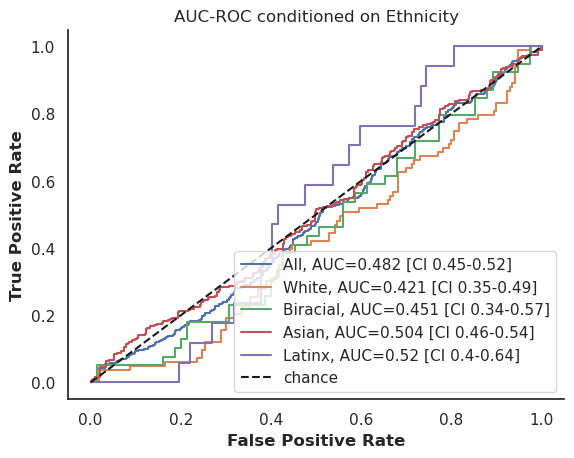

In [819]:
# test_listfile.race.value_counts()[:10].index.tolist()
# test_listfile.race.value_counts()
# ROC curves
# ALL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][:,1],
    test_predictions[:,1]
)
general_auc = np.round(metrics.roc_auc_score(np_test[1][:, 1], test_predictions[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], test_predictions, metric='AUROC')
plt.plot(fpr, tpr, label="All, AUC={} [CI {}-{}]".format(str(general_auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))

# WHITE
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.race == "White"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.race == "White"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.race == "White", 1], pretrained_model.predict(np_test[0][test_listfile.race == "White"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.race == "White"], pretrained_model.predict(np_test[0][test_listfile.race == "White"]), metric='AUROC')
plt.plot(fpr, tpr, label="White, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "White")

# Biracial
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.race == "Biracial"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.race == "Biracial"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.race == "Biracial", 1], pretrained_model.predict(np_test[0][test_listfile.race == "Biracial"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.race == "Biracial"], pretrained_model.predict(np_test[0][test_listfile.race == "Biracial"]), metric='AUROC')
plt.plot(fpr, tpr, label="Biracial, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Biracial")

# ASIAN
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.race == "Asian"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.race == "Asian"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.race == "Asian", 1], pretrained_model.predict(np_test[0][test_listfile.race == "Asian"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.race == "Asian"], pretrained_model.predict(np_test[0][test_listfile.race == "Asian"]), metric='AUROC')
plt.plot(fpr, tpr, label="Asian, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Asian")

# HISPANIC/LATINO
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.race == "Latinx"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.race == "Latinx"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.race == "Latinx", 1], pretrained_model.predict(np_test[0][test_listfile.race == "Latinx"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.race == "Latinx"], pretrained_model.predict(np_test[0][test_listfile.race == "Latinx"]), metric='AUROC')
plt.plot(fpr, tpr, label="Latinx, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Latinx")

plt.plot([0, 1], [0, 1], 'k--', label='chance')  # random predictions curve

#create ROC curve
plt.title('AUC-ROC conditioned on Ethnicity')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(False)
sns.despine()
plt.legend(loc='lower right')
plt.savefig(os.path.join(image_folder, 'ethnicity.pdf'), bbox_inches='tight')

In [820]:
# append row to log file arrays
append_row(general_auc, 'ETHNICITY')
reset_min_max()

## Performance conditioned on Disability

In [821]:
test_listfile.disability.value_counts()

No     1040
Yes      43
Name: disability, dtype: int64

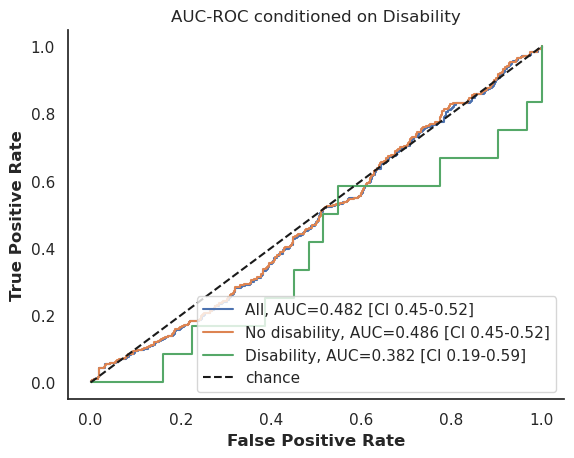

In [822]:
# ROC curves
# ALL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][:,1],
    test_predictions[:,1]
)
general_auc = np.round(metrics.roc_auc_score(np_test[1][:, 1], test_predictions[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], test_predictions, metric='AUROC')
plt.plot(fpr, tpr, label="All, AUC={} [CI {}-{}]".format(str(general_auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))

# No
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.disability == "No"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.disability == "No"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.disability == "No", 1], pretrained_model.predict(np_test[0][test_listfile.disability == "No"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.disability == "No"], pretrained_model.predict(np_test[0][test_listfile.disability == "No"]), metric='AUROC')
plt.plot(fpr, tpr, label="No disability, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "No")

# Yes
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.disability == "Yes"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.disability == "Yes"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.disability == "Yes", 1], pretrained_model.predict(np_test[0][test_listfile.disability == "Yes"])[:, 1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.disability == "Yes"], pretrained_model.predict(np_test[0][test_listfile.disability == "Yes"]), metric='AUROC')
plt.plot(fpr, tpr, label="Disability, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Yes")

plt.plot([0, 1], [0, 1], 'k--', label='chance')  # random predictions curve

#create ROC curve
plt.title('AUC-ROC conditioned on Disability')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(False)
sns.despine()
plt.legend(loc='lower right')
plt.savefig(os.path.join(image_folder, 'disability.pdf'), bbox_inches='tight')

In [823]:
# append row to log file arrays
append_row(general_auc, 'DISABILITY')
reset_min_max()

In [824]:
df_fairness_auc = pd.DataFrame({'metric': con_metrics, 'protected_attribute': con_protected_attributes, 'max_group': con_max_groups, 'max_value': con_max_values, 'max_delta': con_max_deltas, 'min_group': con_min_groups, 'min_value': con_min_values, 'min_delta': con_min_deltas, 'parameters': trainable_count, 'model_name': model_name, 'subfolder': subfolder, 'added_layers': added_layers, 'frozen_layers': frozen_layers, 'tag': tag})
print(df_fairness_auc.head())
df_fairness_auc.to_csv(os.path.join(working_directory, subfolder, model_name.replace('.hdf5', '_conditioned_metrics.csv')), index=False)

  metric protected_attribute max_group  max_value  max_delta    min_group  \
0  AUROC              Gender      Male      0.510      0.028  Transgender   
1  AUROC           ETHNICITY    Latinx      0.520      0.038        White   
2  AUROC          DISABILITY        No      0.486      0.004          Yes   

   min_value  min_delta  parameters               model_name  \
0      0.000     -0.482       94754  simclr.frozen.1.08.hdf5   
1      0.421     -0.061       94754  simclr.frozen.1.08.hdf5   
2      0.382     -0.100       94754  simclr.frozen.1.08.hdf5   

                                    subfolder  added_layers  frozen_layers  \
0  20231128-152601_e200_esTrue_bs128_wTrue_f1             2              1   
1  20231128-152601_e200_esTrue_bs128_wTrue_f1             2              1   
2  20231128-152601_e200_esTrue_bs128_wTrue_f1             2              1   

       tag  
0  frozen1  
1  frozen1  
2  frozen1  


## AIF360
Quantifying biases in data and models
### Data Biases
In this section, we assess biases in the ground truth labels (NOT predicted labels) in training, validation and test data.
#### Train-Validation-Test Set Predictions: Bias Assessment

In [825]:
df.shape

(8122, 7)

In [826]:
y_true = np.hstack([np_train[1][:,1], np_val[1][:,1], np_test[1][:,1]])
len(y_true)

8122

In [827]:
df.loc[:, 'y_true'] = y_true
df

,PID,gender,age,race,generation,disability,year,y_true
0,1.0,Male,18.0,Asian,2.0,No,1,0.0
1,1.0,Male,18.0,Asian,2.0,No,1,0.0
2,1.0,Male,18.0,Asian,2.0,No,1,0.0
3,1.0,Male,18.0,Asian,2.0,No,1,0.0
4,1.0,Male,18.0,Asian,2.0,No,1,0.0
...,...,...,...,...,...,...,...,...
1078,999.0,Male,21.0,Asian,1.0,No,4,0.0
1079,999.0,Male,21.0,Asian,1.0,No,4,0.0
1080,999.0,Male,21.0,Asian,1.0,No,4,0.0
1081,999.0,Male,21.0,Asian,1.0,No,4,0.0


In [828]:
protected_attributes = ['gender', 'race', 'disability']
privileged_classes = [['Male'], ['White'], ['No']]

In [829]:
dataset = StandardDataset(df,
                          label_name='y_true',
                          favorable_classes=[1],  # not a favorable outcome, but perhaps the most important
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'mean_difference', 'disparate_impact_ratio'])
for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)
    bias_columns_metric.loc[len(bias_columns_metric.index)] = [attr, metric_data.mean_difference(), metric_data.disparate_impact()]
    print("Group Fairness - Mean Difference: {}".format(metric_data.mean_difference()))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))
bias_columns_metric.head(10)


Evaluating Outcome Bias for gender
Group Fairness - Mean Difference: 0.09766973734141249
Group Fairness - Disparate Impact Ratio: 1.242453459179544

Evaluating Outcome Bias for race
Group Fairness - Mean Difference: 0.08433062057355284
Group Fairness - Disparate Impact Ratio: 1.2089234030257527

Evaluating Outcome Bias for disability
Group Fairness - Mean Difference: 0.10543596883167844
Group Fairness - Disparate Impact Ratio: 1.23180498527643


,protected_attribute,mean_difference,disparate_impact_ratio
0,gender,0.097670,1.242453
1,race,0.084331,1.208923
2,disability,0.105436,1.231805


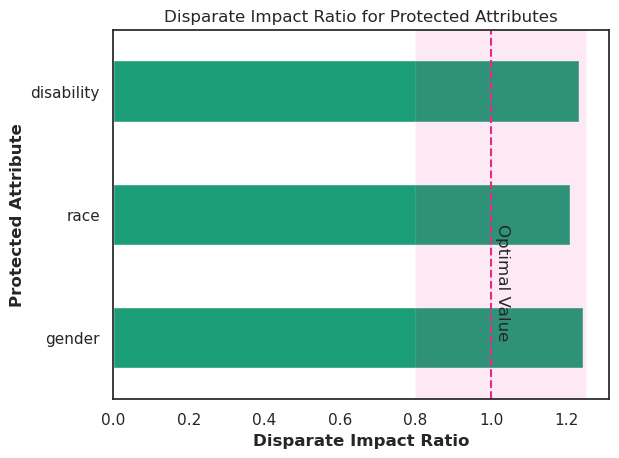

In [830]:
# plt.rcParams.update({'font.size': 15})
# plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
ax = bias_columns_metric[['protected_attribute', 'disparate_impact_ratio']].plot(kind='barh', colormap='Dark2')
ax.set_ylabel('Protected Attribute')
ax.set_xlabel('Disparate Impact Ratio')
ax.get_legend().remove()
ax.set_yticklabels(bias_columns_metric['protected_attribute'])

plt.axvline(x=1.0, color='#e72a8a', linestyle='--')
plt.axvspan(0.8, 1.25, facecolor='#e72a8a', alpha=0.1)
plt.text(1.01,0,'Optimal Value', rotation=270)
plt.title("Disparate Impact Ratio for Protected Attributes")
plt.savefig(os.path.join(image_folder, 'representationDIR.pdf'), format='pdf', bbox_inches="tight")
plt.savefig(os.path.join(image_folder, 'representationDIR.png'), bbox_inches="tight")
# plt.show()

#### Test Set Predictions: Bias Assessment

In [831]:
# test_listfile.rename({'wake':'y_true'}, axis=1, inplace=True)
# test_listfile = test_listfile[['y_true', 'nsrr_age_gt89', 'nsrr_age_gt65', 'nsrr_sex', 'nsrr_race']]
test_listfile.loc[:, 'y_true'] = np_test[1][:,1]
test_listfile

,gender,race,disability,y_pred,y_true
0,Male,Asian,Yes,0,0.0
1,Male,Asian,Yes,1,0.0
2,Male,Asian,Yes,1,0.0
3,Male,Asian,Yes,0,0.0
4,Male,Asian,Yes,0,0.0
...,...,...,...,...,...
1078,Male,Asian,No,0,0.0
1079,Male,Asian,No,0,0.0
1080,Male,Asian,No,0,0.0
1081,Male,Asian,No,0,0.0


In [832]:
dataset = StandardDataset(test_listfile,
                          label_name='y_true',
                          favorable_classes=[1],  # not a favorable outcome, but perhaps the most important
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'mean_difference', 'disparate_impact_ratio'])
for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)
    bias_columns_metric.loc[len(bias_columns_metric.index)] = [attr, metric_data.mean_difference(), metric_data.disparate_impact()]
    print("Group Fairness - Mean Difference: {}".format(metric_data.mean_difference()))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))
bias_columns_metric.head(10)


Evaluating Outcome Bias for gender
Group Fairness - Mean Difference: 0.16593630383093966
Group Fairness - Disparate Impact Ratio: 1.5904245229333434

Evaluating Outcome Bias for race
Group Fairness - Mean Difference: 0.06265714961367136
Group Fairness - Disparate Impact Ratio: 1.1909910705091429

Evaluating Outcome Bias for disability
Group Fairness - Mean Difference: -0.10091079621217258
Group Fairness - Disparate Impact Ratio: 0.7344316897638732


,protected_attribute,mean_difference,disparate_impact_ratio
0,gender,0.165936,1.590425
1,race,0.062657,1.190991
2,disability,-0.100911,0.734432


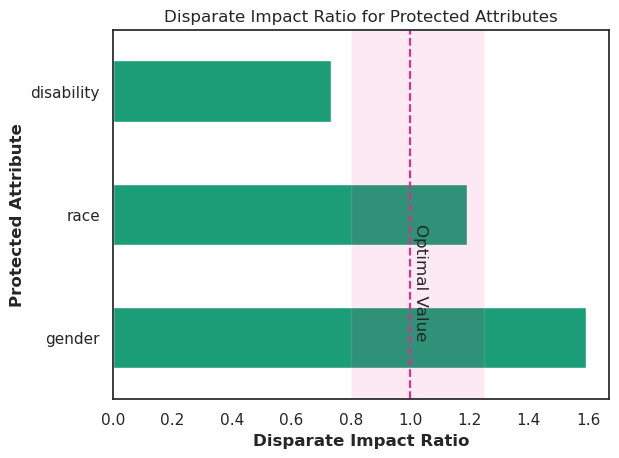

In [833]:
# plt.rcParams.update({'font.size': 15})
# plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
ax = bias_columns_metric[['protected_attribute', 'disparate_impact_ratio']].plot(kind='barh', colormap='Dark2')
ax.set_ylabel('Protected Attribute')
ax.set_xlabel('Disparate Impact Ratio')
ax.get_legend().remove()
ax.set_yticklabels(bias_columns_metric['protected_attribute'])

plt.axvline(x=1.0, color='#e72a8a', linestyle='--')
plt.axvspan(0.8, 1.25, facecolor='#e72a8a', alpha=0.1)
plt.text(1.01,0,'Optimal Value', rotation=270)
plt.title("Disparate Impact Ratio for Protected Attributes")
plt.savefig(os.path.join(image_folder, 'representationDIR.pdf'), format='pdf', bbox_inches="tight")
plt.savefig(os.path.join(image_folder, 'representationDIR.png'), bbox_inches="tight")
# plt.show()

### Model Biases
In this section, we assess biases in the predicted labels in the training, validation, and test data, or in the test data only.
**Interpretations:**
* Disparate Impact Ratio (Same with Statistical Parity Difference): How many users receive mortality predictions in the unprivileged group compared to the privileged group?
* False Positive Rate Ratio: From all the patients who did not eventually die, how many wrongfully received a mortality prediction?
* False Discovery Rate Ratio: TBA
* **False Negative Rate Ratio:** From all the patients who did die, how many had wrongfully received a non-mortality prediction?
* **False Omission Rate Ratio:** From all the patients who received a non-mortality prediction (rightfully or not), how many actually died?
* Error Rate Ratio: How many times was the mortality prediction model wrong?
* Equal Opportunity Difference: From all the patients who did eventually die, how many received a mortality prediction?
* Average Absolute Odds Difference: TBD

![image](metrictree.png)
#### Test Set Predictions: Bias Assessment

In [834]:
# Dataset containing predictions
df_protected = []
df_metric = []
df_value = []

for protected_attribute in protected_attributes:
    print("\n------------- ATTRIBUTE: {} -------------\n".format(protected_attribute))
    true_values, predictions = prepare_dataset_aif360(protected_attribute, test_listfile)
    metric_pred, classified_metric = aif360_model(true_values, predictions, protected_attribute, privileged_classes[protected_attributes.index(protected_attribute)], favorable_class=1)
    fairness_metrics = print_aif360_result(metric_pred, classified_metric)
    df_protected = df_protected + [protected_attribute for x in range(len(fairness_metrics))]
    df_metric = df_metric + list(fairness_metrics.keys())
    df_value = df_value + list(fairness_metrics.values())
    # evaluating in terms of accuracy
    print_aif360_accuracy_metrics(classified_metric)
df_fairness_metrics = pd.DataFrame({'protected_attribute': df_protected, 'fairness_metric': df_metric, 'value': df_value, 'parameters': trainable_count, 'model_name': model_name, 'subfolder': subfolder, 'added_layers': added_layers, 'frozen_layers': frozen_layers, 'tag': tag})


------------- ATTRIBUTE: gender -------------

statistical_parity_difference: -0.027599715099715094
disparate_impact: 0.9322552447552448
equal_opportunity_difference: -0.07687803245775476
average_absolute_odds_difference: 0.042126176852454206
error_rate_difference: 0.06767429193899777
error_rate_ratio: 1.1493389423076923
false_discovery_rate_ratio: 0.8424225119761429
false_negative_rate_ratio: 1.132230215827338
false_omission_rate_ratio: 1.7149354005167958
false_positive_rate_ratio: 1.0182971880568474
true_positive_rate_difference: -0.07687803245775476
Privileged Group: {'TP': 54.0, 'FP': 133.0, 'TN': 197.0, 'FN': 75.0}
Unprivileged Group: {'TP': 95.0, 'FP': 142.0, 'TN': 204.0, 'FN': 183.0}

Overall Accuracy: 0.5078485687903971
Privileged Group: 0.5468409586056645
Unprivileged Group: 0.4791666666666667

Overall Error Rate: 0.4921514312096029
Privileged Group: 0.4531590413943355
Unprivileged Group: 0.5208333333333333

------------- ATTRIBUTE: race -------------

statistical_parity_diff

In [835]:
df_fairness_metrics

,protected_attribute,fairness_metric,value,parameters,model_name,subfolder,added_layers,frozen_layers,tag
0,gender,statistical_parity_difference,-0.027600,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
1,gender,disparate_impact,0.932255,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
2,gender,equal_opportunity_difference,-0.076878,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
3,gender,average_absolute_odds_difference,0.042126,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
4,gender,error_rate_difference,0.067674,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
5,gender,error_rate_ratio,1.149339,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
6,gender,false_discovery_rate_ratio,0.842423,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
7,gender,false_negative_rate_ratio,1.132230,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
8,gender,false_omission_rate_ratio,1.714935,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
9,gender,false_positive_rate_ratio,1.018297,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1


In [836]:
df_fairness_metrics.to_csv(os.path.join(working_directory, subfolder, model_name.replace('.hdf5', '_fairness_metrics.csv')), index=False)
df_fairness_metrics.head()

,protected_attribute,fairness_metric,value,parameters,model_name,subfolder,added_layers,frozen_layers,tag
0,gender,statistical_parity_difference,-0.027600,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
1,gender,disparate_impact,0.932255,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
2,gender,equal_opportunity_difference,-0.076878,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
3,gender,average_absolute_odds_difference,0.042126,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1
4,gender,error_rate_difference,0.067674,94754,simclr.frozen.1.08.hdf5,20231128-152601_e200_esTrue_bs128_wTrue_f1,2,1,frozen1


In [837]:
print("\n--- Test Performance Overall ---")
test_predictions = pretrained_model.predict(np_test[0])
test_performance = simclr_utitlities.evaluate_model_simple(test_predictions, np_test[1], return_dict=True)
print(test_performance)


--- Test Performance Overall ---
{'Accuracy': 0.5078485687903971, 'Balanced Accuracy': 0.4796443161827777, 'AUROC': 0.4823175784714246, 'AUPRC Macro': 0.3686948688724948, 'AUPRC Micro': 0.3686948688724948, 'Confusion Matrix': array([[401, 275],
       [258, 149]], dtype=int64), 'F1 Macro': 0.47967657756324455, 'F1 Micro': 0.5078485687903971, 'F1 Weighted': 0.50974906026207, 'Precision': 0.47995640908179915, 'Recall': 0.4796443161827777, 'Kappa': -0.04037582208828905}
